In [4]:
####Question1

import numpy as np
import pandas as pd

# Test scores for the 10 students (excluding Student ID)
test_scores = np.array([
    [1, 8, 9, 3],
    [3, 6, 3, 9],
    [4, 2, 1, 1],
    [6, 10, 2, 1],
    [3, 5, 2, 6],
    [7, 9, 10, 3],
    [6, 9, 6, 1],
    [5, 2, 4, 3],
    [1, 7, 7, 8],
    [4, 6, 4, 2]
])

# PCA weights (rows = Test1 to Test4, columns = PC1, PC2, PC3)
pca_weights = np.array([
    [0.8, 0.0, 0.8],  # Test1
    [0.3, 0.8, 0.3],  # Test2
    [0.9, 0.4, 0.3],  # Test3
    [0.2, 0.8, 0.8]   # Test4
])

# Select the first three students' scores
first_three_students = test_scores[:3, :]

# Compute the first two PCA components
first_two_pcs = first_three_students @ pca_weights[:, :2]

# Convert to DataFrame for clear output
result_df = pd.DataFrame(first_two_pcs, columns=["PC1", "PC2"], index=[1, 2, 3])

print("First two PCA components for the first three students:")
print(result_df)


First two PCA components for the first three students:
    PC1   PC2
1  11.9  12.4
2   8.7  13.2
3   4.9   2.8


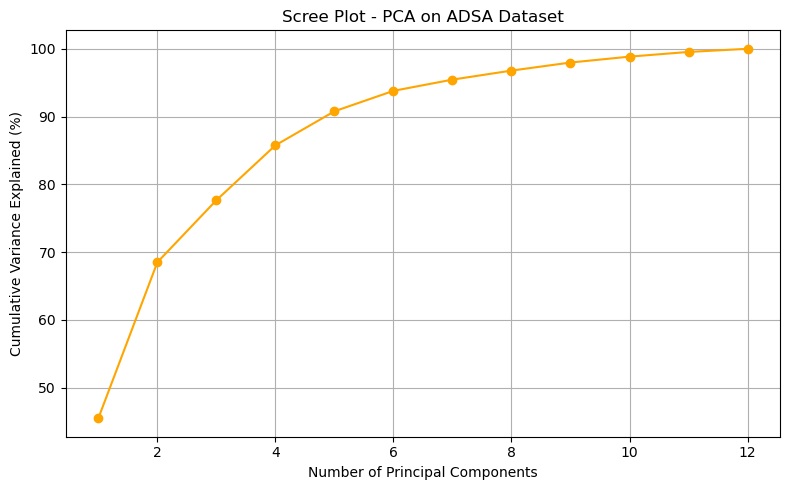

Variance retained with 2 components: 68.49%
Variance retained with 3 components: 77.65%

Transformed dataset (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.308365 -0.931713  0.057042  2.292632 -0.373401 -0.860491  0.698127   
1 -2.034947 -2.803698  1.675399  1.155492  0.805882  0.460336  0.030189   
2 -2.552441 -2.012644  2.687010  0.521291  0.164976  0.426913 -0.271561   
3 -1.638918 -0.438149  1.718712  1.365928 -0.127042  0.208062 -0.471407   
4 -0.221407 -2.673904  0.400004  2.103663  0.004738  1.094805 -0.157765   

        PC8       PC9      PC10      PC11      PC12  
0  0.070821 -0.250047 -0.221815  0.171945  0.096920  
1  0.460140  0.723536 -0.720846  0.049635 -0.245461  
2 -0.297512 -0.433693 -0.355521  0.280934 -0.043486  
3 -0.128870  0.286339  0.433536  0.112368  0.006389  
4  0.030095  0.451535  1.034062 -0.030670  0.532711  


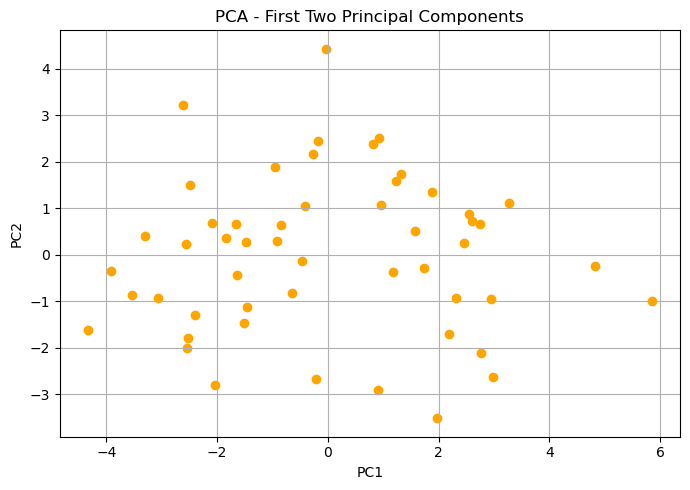

In [6]:
### Question 2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/Users/omkarkalekar/Downloads/roles_life_cycle_mapping_wide.csv')

# Step 2: Clean the dataset
# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# Step 3: Standardize the data (zero-mean, unit-variance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 4: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Step 5: Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='orange')
plt.title('Scree Plot - PCA on ADSA Dataset')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Print variance retained with first 2 PCs (as example)
print(f"Variance retained with 2 components: {cumulative_variance[1]:.2f}%")
print(f"Variance retained with 3 components: {cumulative_variance[2]:.2f}%")

# Step 7: Output transformed dataset
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print("\nTransformed dataset (first 5 rows):")
print(pca_df.head())

# Step 8: Scatter plot of first two principal components
plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='orange')
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
### Question 3

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso

# Step 1: Load the dataset
df = pd.read_csv('/Users/omkarkalekar/Downloads/BMI.csv')

# Step 2: Prepare the dataset
# Drop 'Age' column and rows with missing values
df_clean = df.drop(columns=['Age']).dropna()

# Separate features and target
X = df_clean.drop(columns=['fatpctg'])
y = df_clean['fatpctg']

# Step 3: Filter Method (Univariate Feature Selection)
filter_selector = SelectKBest(score_func=f_regression, k=5)
filter_selector.fit(X, y)
top_filter_features = X.columns[filter_selector.get_support()].tolist()

# Step 4: Wrapper Method (RFE with Linear Regression)
wrapper_model = LinearRegression()
rfe_selector = RFE(estimator=wrapper_model, n_features_to_select=5)
rfe_selector.fit(X, y)
top_wrapper_features = X.columns[rfe_selector.support_].tolist()

# Step 5: Embedded Method (Lasso Regression)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X, y)
# Take top 5 absolute coefficients
top_embedded_features = X.columns[np.argsort(np.abs(lasso.coef_))[-5:]].tolist()

# Step 6: Display results
print("Top 5 Features Selected by:")
print(f"Filter Method    : {top_filter_features}")
print(f"Wrapper Method   : {top_wrapper_features}")
print(f"Embedded Method  : {top_embedded_features}")

# Optional: Create summary DataFrame
summary_df = pd.DataFrame({
    "Filter Method": pd.Series(top_filter_features),
    "Wrapper Method": pd.Series(top_wrapper_features),
    "Embedded Method": pd.Series(top_embedded_features)
})

print("\nFeature Selection Summary:")
print(summary_df)


Top 5 Features Selected by:
Filter Method    : ['Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh']
Wrapper Method   : ['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist']
Embedded Method  : ['Hip', 'Forearm', 'Neck', 'Abdomen', 'Wrist']

Feature Selection Summary:
  Filter Method Wrapper Method Embedded Method
0        Weight           Neck             Hip
1         Chest        Abdomen         Forearm
2       Abdomen            Hip            Neck
3           Hip        Forearm         Abdomen
4         Thigh          Wrist           Wrist
